In [533]:
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns
import numpy as np
from scipy import optimize
import math
from scipy import special

In [534]:
T = 2

In [535]:
w=10*10**-6
L=20*10**-6
t=70*10**-9
e = 1.6*10**-19
h= 6.62607004*10**-34
pi= math.pi

In [536]:
df = pd.read_csv('CoSi_%dK_MRxx.csv' %T)

In [537]:
df=df.drop(labels =['Unnamed: 0'],axis = 1)

In [538]:
df.columns

Index(['Magnetic field (Oe)', 'Rxx_B_perpendicular_to_I', 'MR_perpendicular',
       'Magnetic field (Oe).1', 'Rxx_B//I', 'MR_parallel'],
      dtype='object')

### data rearrange

In [539]:
df['Magnetic field (T)']=df['Magnetic field (Oe)']/10000
df['rho_xy (uOhm-m)']=df['Rxx_B_perpendicular_to_I']*(w/L)*t*10**6

df['conductance (1/Ohm)']=np.reciprocal(df['Rxx_B_perpendicular_to_I'])
df_xx = df[['Magnetic field (T)','Rxx_B_perpendicular_to_I','rho_xy (uOhm-m)','conductance (1/Ohm)']]
df_xx = df_xx.dropna(axis=0, how='any', inplace=False) 
df_xx

,Magnetic field (T),Rxx_B_perpendicular_to_I,rho_xy (uOhm-m),conductance (1/Ohm)
0,6.793889,16.852052,0.589822,0.059340
1,6.538595,16.838177,0.589336,0.059389
2,6.209574,16.820191,0.588707,0.059452
3,5.912191,16.803953,0.588138,0.059510
4,5.603393,16.786985,0.587544,0.059570
...,...,...,...,...
91,6.096319,16.813288,0.588465,0.059477
92,6.391350,16.829442,0.589030,0.059420
93,6.690131,16.845611,0.589596,0.059363
94,6.983186,16.861570,0.590155,0.059306


In [540]:
#shift data to make it cross (0,0)
l=[]
l2=[]
a=1
thr=0.15
while a<len(df_xx):
    if abs(df_xx.iloc[a]['Magnetic field (T)']-0)<thr:
        l.append(df_xx.iloc[a]['conductance (1/Ohm)']) 
        l2.append(df_xx.iloc[a]['Magnetic field (T)'])
    a+=1
global mean
mean=sum(l)/len(l)
df_xx['delta conductace (1/Ohm)']=(df_xx['conductance (1/Ohm)']-mean)
l2

[-0.10996660000000004, 0.09559355]

In [541]:
df_xx.columns

Index(['Magnetic field (T)', 'Rxx_B_perpendicular_to_I', 'rho_xy (uOhm-m)',
       'conductance (1/Ohm)', 'delta conductace (1/Ohm)'],
      dtype='object')

In [542]:
#shift data to make it cross (0,0)
l=[]
l2=[]
a=1
thr=0.15
while a<len(df_xx):
    if abs(df_xx.iloc[a]['Magnetic field (T)']-0)<thr:
        l.append(df_xx.iloc[a]['rho_xy (uOhm-m)']) 
        l2.append(df_xx.iloc[a]['Magnetic field (T)'])
    a+=1
global mean
mean=sum(l)/len(l)
df_xx['delta rho_xy (uOhm-m)']=(df_xx['rho_xy (uOhm-m)']-mean)
l2

[-0.10996660000000004, 0.09559355]

In [543]:
df_xx['delta conductance (e^2/pi-h)']=df_xx['delta conductace (1/Ohm)']/(e**2/(pi*h))
df_xx

,Magnetic field (T),Rxx_B_perpendicular_to_I,rho_xy (uOhm-m),conductance (1/Ohm),delta conductace (1/Ohm),delta rho_xy (uOhm-m),delta conductance (e^2/pi-h)
0,6.793889,16.852052,0.589822,0.059340,-0.001214,0.011823,-98.702798
1,6.538595,16.838177,0.589336,0.059389,-0.001165,0.011338,-94.726734
2,6.209574,16.820191,0.588707,0.059452,-0.001101,0.010708,-89.562778
3,5.912191,16.803953,0.588138,0.059510,-0.001044,0.010140,-84.891284
4,5.603393,16.786985,0.587544,0.059570,-0.000984,0.009546,-80.000270
...,...,...,...,...,...,...,...
91,6.096319,16.813288,0.588465,0.059477,-0.001077,0.010467,-87.578140
92,6.391350,16.829442,0.589030,0.059420,-0.001134,0.011032,-92.220162
93,6.690131,16.845611,0.589596,0.059363,-0.001191,0.011598,-96.857867
94,6.983186,16.861570,0.590155,0.059306,-0.001247,0.012157,-101.426477


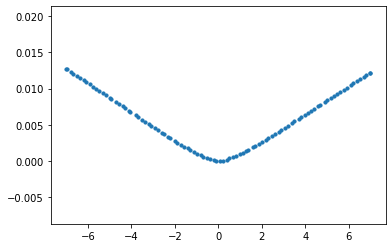

In [544]:
x=np.array(df_xx['Magnetic field (T)'])
y=np.array(df_xx['delta rho_xy (uOhm-m)'])
z=np.array(df_xx['delta conductance (e^2/pi-h)'])
plt.scatter(x,y,s=10)
#plt.scatter(x,z)
#plt.ylim(0.0592,0.0606)
#plt.ylim(-0.00135,0.00001)

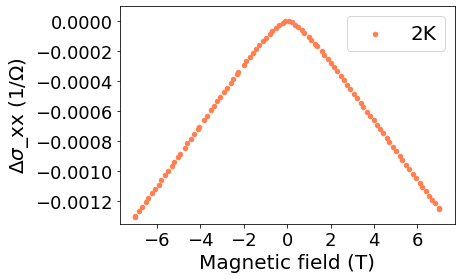

In [545]:
x=np.array(df_xx['Magnetic field (T)'])
y=np.array(df_xx['delta conductace (1/Ohm)'])
plt.figure(figsize=(6, 4))
plt.scatter(x, y, label='%dK' %T,color='coral',s=20)
plt.legend(loc='best',fontsize=20)
#plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0), useMathText=True)
#plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
plt.autoscale(enable=True, axis='y') 
plt.ylim(-0.00135,0.0001)
#plt.xlim(-1, 1)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Magnetic field (T)',fontsize=20)
plt.ylabel('$\u0394$$\sigma$_xx (1/$\Omega$)',fontsize=20)
plt.show()

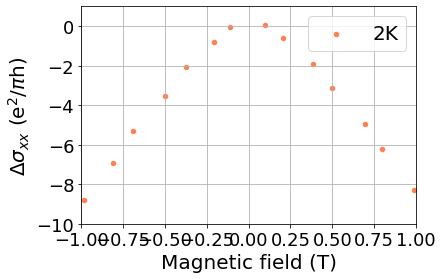

In [546]:
x=np.array(df_xx['Magnetic field (T)'])
y=np.array(df_xx['delta conductance (e^2/pi-h)'])
plt.figure(figsize=(6, 4))
plt.scatter(x, y, label='%dK' %T,color='coral',s=20)
plt.legend(loc='best',fontsize=20)
#plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0), useMathText=True)
#plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
plt.autoscale(enable=True, axis='y') 
#plt.ylim(-0.00135,0.0001)
plt.xlim(-1, 1)
plt.ylim(-10, 1)
plt.grid(axis='both')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Magnetic field (T)',fontsize=20)
plt.ylabel('$\u0394$$\sigma$$_{xx}$ (e$^{2}$/$\pi$h)',fontsize=20)
plt.show()

### WAL fitting

In [547]:
#One channel fitting
x=np.array(df_xx['Magnetic field (T)'])
y=np.array(df_xx['delta conductance (e^2/pi-h)'])
h_bar=h/(2*pi)
def WAL(x,a,Bphi):
    return a*((special.polygamma(0, Bphi/abs(x)))-np.log(Bphi/abs(x)))
#-16*H*(ne*ue**2/(1+(ue*H)**2)-nh*uh**2/(1+(uh*H)**2))
    #(-1.6*10**-19*x*(ne*ue**2/(1+(ue*x)**2))*10**-6)
#popt, pcov = optimize.curve_fit(WAL, x, y,p0=[1,0],bounds=((1,0),(10,1000)),maxfev=50000000000)
popt, pcov = optimize.curve_fit(WAL, x, y,bounds=((0),(1)),maxfev=10000000)
#calculate r_square
residuals = y- WAL(x, *popt)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y-np.mean(y))**2)
r_squared = 1 - (ss_res / ss_tot)
print(popt)
print(r_squared)

[1.         0.06656938]
0.9915676998814649


In [554]:
x=np.array(df_xx['Magnetic field (T)'])
y=np.array(df_xx['delta conductance (e^2/pi-h)'])
h_bar=h/(2*pi)
def WAL(x,a,Bphi):
    return a*((special.polygamma(0, Bphi/abs(x)))-np.log(Bphi/abs(x)))
#popt, pcov = optimize.curve_fit(WAL, x, y,p0=[1,0],bounds=((1,0),(10,1000)),maxfev=50000000000)
popt, pcov = optimize.curve_fit(WAL, x, y,maxfev=10000000)
#calculate r_square
residuals = y- WAL(x, *popt)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y-np.mean(y))**2)
r_squared = 1 - (ss_res / ss_tot)
print(popt)
print(r_squared)

[15.15450122  0.81037324]
0.9972268694862938


C:\Users\alial\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


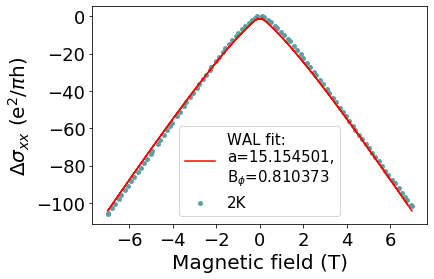

In [555]:
plt.figure(figsize=(6, 4))
plt.scatter(x, y, label='%dK' %T,color='cadetblue',s=15)
plt.plot(x, WAL(x, *popt), 'r', label='WAL fit:\na=%f,\nB$_{\phi}$=%f' % tuple(popt), )
#plt.plot(x, test_func(x, *popt), 'r-', label='fit:\nn=%f,\nu=%f' % tuple(popt))
plt.legend(loc='best',fontsize=15)
#plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0), useMathText=True)
#plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
plt.autoscale(enable=True, axis='y') 
#plt.ylim(-0.00075, 0.00075)
#plt.xlim(-1, 1)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Magnetic field (T)',fontsize=20)
plt.ylabel('$\u0394$$\sigma$$_{xx}$ (e$^{2}$/$\pi$h)',fontsize=20)
plt.show()

In [550]:
#2 carrier fitting
x=np.array(df_xx['Magnetic field (T)'])
y=np.array(df_xx['delta rho_xy (uOhm-m)'])
h_bar=h/(2*pi)
def rhoxy(x,nh,ne,uh,ue):
    return((ne*ue+nh*uh)+(ne*ue*uh**2+nh*ue**2*uh)*x**2)/(16*((ne*ue+nh*uh)**2+(nh-ne)**2*ue**2*uh**2*x**2))
#def WAL(x,a,Bphi):
    #return a*((special.polygamma(0, Bphi/abs(x)))-np.log(Bphi/abs(x)))
#-16*H*(ne*ue**2/(1+(ue*H)**2)-nh*uh**2/(1+(uh*H)**2))
    #(-1.6*10**-19*x*(ne*ue**2/(1+(ue*x)**2))*10**-6)
popt_rhoxy, pcov_rhoxy = optimize.curve_fit(rhoxy, x, y,maxfev=10000000,p0=[1,0,1,0],bounds=[(1,0,1,0),(100,100,100,100)])
#popt_rhoxy, pcov_rhoxy = optimize.curve_fit(rhoxy, x, y,maxfev=10000000)
#calculate r_square
residuals = y- rhoxy(x, *popt_rhoxy)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y-np.mean(y))**2)
r_squared = 1 - (ss_res / ss_tot)
print(popt_rhoxy)
print(r_squared)

[ 7.07274359  1.92997265 18.74009781  0.22503533]
0.9962642557081329


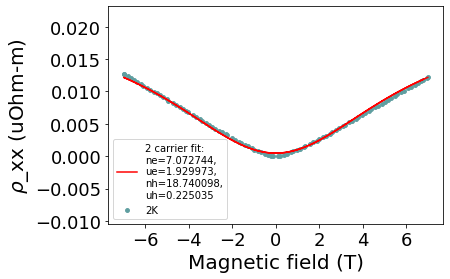

In [551]:
plt.figure(figsize=(6, 4))
plt.scatter(x, y, label='%dK' %T,color='cadetblue',s=15)
plt.plot(x, rhoxy(x, *popt_rhoxy), 'r', label='2 carrier fit:\nne=%f,\nue=%f,\nnh=%f,\nuh=%f' % tuple(popt_rhoxy), )
#plt.plot(x, test_func(x, *popt), 'r-', label='fit:\nn=%f,\nu=%f' % tuple(popt))
plt.legend(loc='best',fontsize=10)
#plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0), useMathText=True)
#plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
plt.autoscale(enable=True, axis='y') 
#plt.ylim(-0.00075, 0.00075)
#plt.xlim(-1, 1)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Magnetic field (T)',fontsize=20)
plt.ylabel('$\u03C1$_xx (uOhm-m)',fontsize=20)
plt.show()